### 计算传播与统计初步
***
***
# 分析天涯论坛的帖子
***
***

王成军 

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

In [418]:
%matplotlib inline
import matplotlib.pyplot as plt


![](./img/matplotlib.svg)

In [420]:
import pandas as pd

![](./img/pandas_logo.png)

In [34]:
df = pd.read_csv('/Users/chengjun/github/cjc2016/data/tianya_bbs_threads_list.txt', sep = "\t", header=None)
df[:2]

,0,1,2,3,4,5,6
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41


In [60]:
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:5]

,title,link,author,author_page,click,reply,time
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41
2,"宁波准备停止PX项目了,元芳,你怎么看?",/post-free-2848797-1.shtml,牧阳光,http://www.tianya.cn/36535656,82779,625,2012-10-28 19:11
3,"【吴钩一言堂】漳州PX成""二踢响"",说明老百姓科学素质不低",/post-free-5043260-1.shtml,挑灯看吴钩,http://www.tianya.cn/36959960,45304,219,2015-04-07 21:30
4,PX是否有毒?宁波镇海事件谁在推波助澜(转载),/post-free-2848995-1.shtml,zzjzzpgg12,http://www.tianya.cn/53134970,38132,835,2012-10-28 21:08


In [55]:
da = pd.read_csv('/Users/chengjun/github/cjc2016/data/tianya_bbs_threads_author_info.txt', sep = "\t", header=None)
da[:2]

,0,1,2,3,4
0,http://www.tianya.cn/50499450,152,27452,1020,1341
1,http://www.tianya.cn/74341835,0,1,2,5


In [61]:
da=da.rename(columns = {0:'author_page', 1:'followed_num', 2:'fans_num',3:'post_num', 4:'comment_num'})
da[:5]

,author_page,followed_num,fans_num,post_num,comment_num
0,http://www.tianya.cn/50499450,152,27452,1020,1341
1,http://www.tianya.cn/74341835,0,1,2,5
2,http://www.tianya.cn/36535656,19,28,816,1268
3,http://www.tianya.cn/36959960,25,307,513,1237
4,http://www.tianya.cn/53134970,17,22,79,3256


In [435]:
data = pd.concat([df,da], axis=1)
len(data)

467

In [436]:
data[:3]

,title,link,author,author_page,click,reply,time,author_page,followed_num,fans_num,post_num,comment_num
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59,http://www.tianya.cn/50499450,152,27452,1020,1341
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41,http://www.tianya.cn/74341835,0,1,2,5
2,"宁波准备停止PX项目了,元芳,你怎么看?",/post-free-2848797-1.shtml,牧阳光,http://www.tianya.cn/36535656,82779,625,2012-10-28 19:11,http://www.tianya.cn/36535656,19,28,816,1268


# Time

In [437]:
type(data.time[0])

str

In [438]:
# extract date from datetime
date = map(lambda x: x[:10], data.time)
data['date'] = pd.to_datetime(date)

In [439]:
# convert str to datetime format
data.time = pd.to_datetime(data.time)
data['month'] = data.time.dt.month
data['year'] = data.time.dt.year
data['day'] = data.time.dt.day
type(data.time[0])

pandas.tslib.Timestamp

In [440]:
data[:3]

,title,link,author,author_page,click,reply,time,author_page,followed_num,fans_num,post_num,comment_num,date,month,year,day
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59:00,http://www.tianya.cn/50499450,152,27452,1020,1341,2012-10-29,10,2012,29
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41:00,http://www.tianya.cn/74341835,0,1,2,5,2012-10-24,10,2012,24
2,"宁波准备停止PX项目了,元芳,你怎么看?",/post-free-2848797-1.shtml,牧阳光,http://www.tianya.cn/36535656,82779,625,2012-10-28 19:11:00,http://www.tianya.cn/36535656,19,28,816,1268,2012-10-28,10,2012,28


# Statsmodels

http://statsmodels.sourceforge.net/

![](./img/statsmodels_hybi_banner.png)

Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. 

An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator. 

Researchers across fields may find that statsmodels fully meets their needs for statistical computing and data analysis in Python. 

# Features include:

- Linear regression models
- Generalized linear models
- Discrete choice models
- Robust linear models
- Many models and functions for time series analysis
- Nonparametric estimators
- A collection of datasets for examples
- A wide range of statistical tests
- Input-output tools for producing tables in a number of formats and for reading Stata files into NumPy and Pandas.
- Plotting functions
- Extensive unit tests to ensure correctness of results
- Many more models and extensions in development

In [325]:
import statsmodels.api as sm

In [326]:
'   '.join(dir(sm))

'GEE   GLM   GLS   GLSAR   Logit   MNLogit   MixedLM   NegativeBinomial   NominalGEE   OLS   OrdinalGEE   PHReg   Poisson   ProbPlot   Probit   QuantReg   RLM   WLS   __builtins__   __doc__   __file__   __name__   __package__   add_constant   categorical   cov_struct   datasets   distributions   emplike   families   formula   genmod   graphics   iolib   load   nonparametric   qqline   qqplot   qqplot_2samples   regression   robust   show_versions   stats   test   tools   tsa   version   webdoc'

In [327]:
'   '.join(dir(sm.stats))

'CompareCox   CompareJ   CompareMeans   DescrStatsW   Describe   FTestAnovaPower   FTestPower   GofChisquarePower   HetGoldfeldQuandt   NormalIndPower   Runs   TTestIndPower   TTestPower   __builtins__   __doc__   __file__   __name__   __package__   acorr_breush_godfrey   acorr_ljungbox   anova_lm   binom_test   binom_test_reject_interval   binom_tost   binom_tost_reject_interval   breaks_cusumolsresid   breaks_hansen   chisquare_effectsize   cochrans_q   compare_cox   compare_j   corr_clipped   corr_nearest   cov_cluster   cov_cluster_2groups   cov_hac   cov_hc0   cov_hc1   cov_hc2   cov_hc3   cov_nearest   cov_nw_panel   cov_white_simple   diagnostic   durbin_watson   fdrcorrection   fdrcorrection_twostage   gof   gof_chisquare_discrete   het_arch   het_breushpagan   het_goldfeldquandt   het_white   jarque_bera   lillifors   linear_harvey_collier   linear_lm   linear_rainbow   mcnemar   moment_helpers   multicomp   multipletests   normal_ad   omni_normtest   power_binom_tost   power_

# Describe

In [370]:
data.describe()

,click,reply,month,year,day
count,467.000000,467.000000,467.000000,467.000000,467.000000
mean,1534.957173,18.907923,7.432548,2012.620985,17.961456
std,11099.249834,144.869921,3.084860,1.795269,9.491730
min,11.000000,0.000000,1.000000,2006.000000,1.000000
25%,42.500000,0.000000,5.000000,2013.000000,8.000000
50%,84.000000,0.000000,6.000000,2013.000000,23.000000
75%,322.000000,4.000000,11.000000,2013.000000,25.000000
max,194675.000000,2703.000000,12.000000,2015.000000,31.000000


In [162]:
import numpy as np

np.mean(data.click), np.std(data.click), np.sum(data.click)

(1534.9571734475376, 11087.35990002894, 716825)

In [328]:
# 不加权的变量描述
d1 = sm.stats.DescrStatsW(data.click, weights=[1 for i in data.click])
d1.mean, d1.var, d1.std, d1.sum

(1534.9571734475376, 122929549.55276975, 11087.35990002894, 716825.0)

In [329]:
# 加权的变量描述
d1 = sm.stats.DescrStatsW(data.click, weights=data.reply)
d1.mean, d1.var, d1.std, d1.sum

(83335.963986409959, 6297145701.6868114, 79354.556905617035, 735856562.0)

In [163]:
np.median(data.click)

84.0

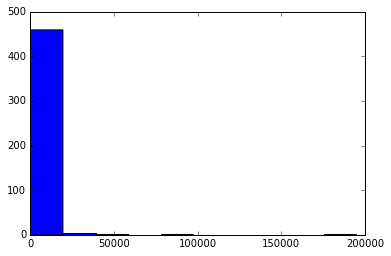

In [176]:
plt.hist(data.click)
plt.show()

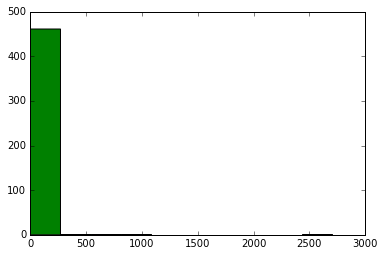

In [186]:
plt.hist(data.reply, color = 'green')
plt.show()

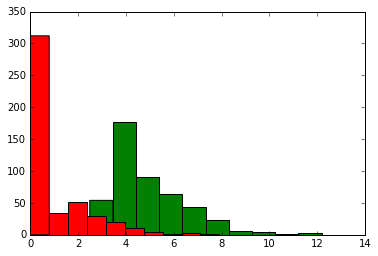

In [185]:
plt.hist(np.log(data.click+1), color='green')
plt.hist(np.log(data.reply+1), color='red')
plt.show()

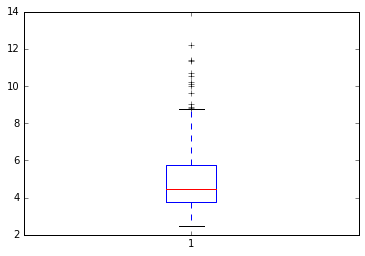

In [170]:
# Plot the height and weight to see
plt.boxplot([np.log(data.click+1)])
plt.show()

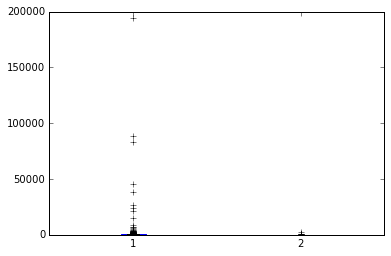

In [152]:
# Plot the height and weight to see
plt.boxplot([data.click, data.reply])
plt.show()

In [172]:
def transformData(dat):
    results = []
    for i in dat:
        if i != 'na':
            results.append( int(i))
        else:
            results.append(0)
    return results

In [441]:
data.fans_num = transformData(data.fans_num)
data.followed_num = transformData(data.followed_num )
data.post_num = transformData(data.post_num )
data.comment_num = transformData(data.comment_num )

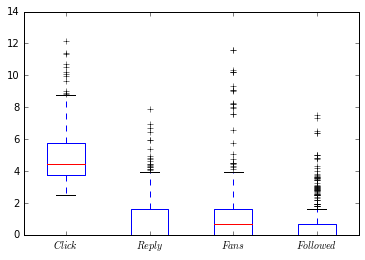

In [379]:
# Plot the height and weight to see
plt.boxplot([np.log(data.click+1), np.log(data.reply+1), 
             np.log(data.fans_num+1), np.log(data.followed_num + 1)], 
            labels = ['$Click$', '$Reply$', '$Fans$', '$Followed$'])
plt.show()

# Pandas自身已经包含了boxplot的功能

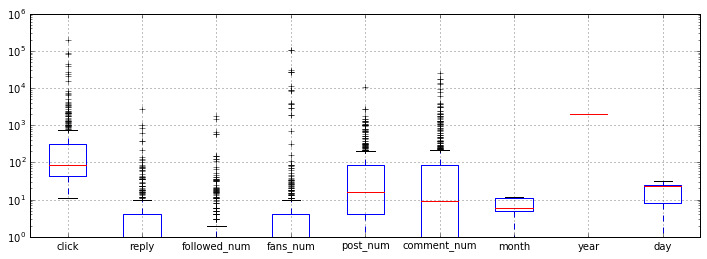

In [380]:
fig = plt.figure(figsize=(12,4))
data.boxplot(return_type='dict')
plt.yscale('log')
plt.show()

In [381]:
'   '.join(dir(data))

'T   _AXIS_ALIASES   _AXIS_IALIASES   _AXIS_LEN   _AXIS_NAMES   _AXIS_NUMBERS   _AXIS_ORDERS   _AXIS_REVERSED   _AXIS_SLICEMAP   __abs__   __add__   __and__   __array__   __array_wrap__   __bool__   __bytes__   __class__   __contains__   __delattr__   __delitem__   __dict__   __dir__   __div__   __doc__   __eq__   __finalize__   __floordiv__   __format__   __ge__   __getattr__   __getattribute__   __getitem__   __getstate__   __gt__   __hash__   __iadd__   __idiv__   __imul__   __init__   __invert__   __ipow__   __isub__   __iter__   __itruediv__   __le__   __len__   __lt__   __mod__   __module__   __mul__   __ne__   __neg__   __new__   __nonzero__   __or__   __pow__   __radd__   __rand__   __rdiv__   __reduce__   __reduce_ex__   __repr__   __rfloordiv__   __rmod__   __rmul__   __ror__   __round__   __rpow__   __rsub__   __rtruediv__   __rxor__   __setattr__   __setitem__   __setstate__   __sizeof__   __str__   __sub__   __subclasshook__   __truediv__   __unicode__   __weakref__   __xo

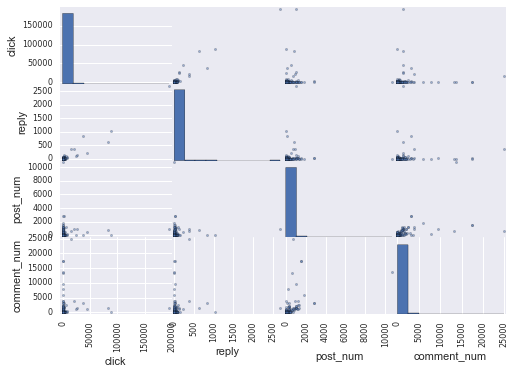

In [454]:
from pandas.tools import plotting

#fig = plt.figure(figsize=(10, 10))
plotting.scatter_matrix(data[['click', 'reply', 'post_num','comment_num']]) 
plt.show()

In [450]:
'  '.join(dir(plotting))

'AbstractMethodError  Appender  AreaPlot  BarPlot  BarhPlot  BasePlotMethods  BoxPlot  FramePlotMethods  HexBinPlot  HistPlot  Index  KdePlot  LinePlot  LooseVersion  MPLPlot  MultiIndex  PandasObject  PeriodIndex  PiePlot  PlanePlot  ScatterPlot  Series  SeriesPlotMethods  _Options  __builtins__  __doc__  __file__  __name__  __package__  _all_kinds  _common_kinds  _dataframe_kinds  _flatten  _gca  _gcf  _get_all_lines  _get_layout  _get_marker_compat  _get_standard_colors  _get_standard_kind  _get_xlim  _grouped_plot  _grouped_plot_by_column  _handle_shared_axes  _klasses  _mpl_ge_1_3_1  _mpl_ge_1_4_0  _mpl_ge_1_5_0  _mpl_le_1_2_1  _plot  _plot_klass  _remove_labels_from_axis  _series_kinds  _set_ticks_props  _shared_doc_df_kwargs  _shared_doc_kwargs  _shared_doc_series_kwargs  _shared_docs  _subplots  andrews_curves  autocorrelation_plot  bootstrap_plot  boxplot  boxplot_frame_groupby  cache_readonly  ceil  colors  com  compat  contextmanager  conv  cycler  deprecate_kwarg  df_ax  df

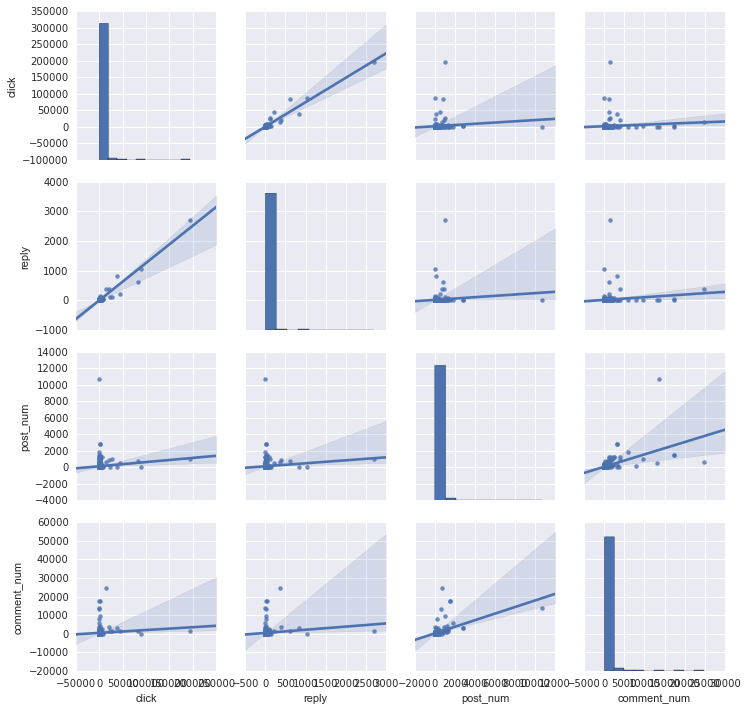

In [455]:
import seaborn
seaborn.pairplot(data, vars=['click', 'reply', 'post_num', 'comment_num'],
                  kind='reg')  

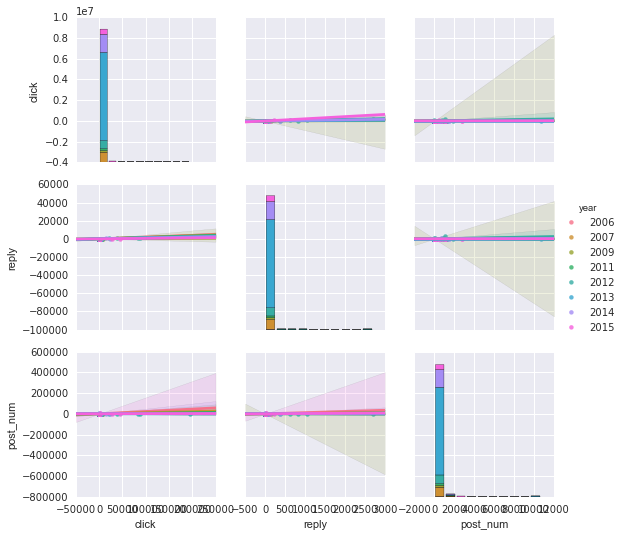

In [458]:
seaborn.pairplot(data, vars=['click', 'reply', 'post_num'],
                 kind='reg', hue='year')  

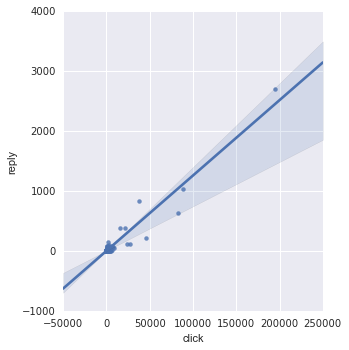

In [457]:
seaborn.lmplot(y='reply', x='click', data=data)  


# T-test

http://statsmodels.sourceforge.net/devel/stats.html

In [323]:
from scipy import stats
stats.ttest_ind(data.click, data.reply)

Ttest_indResult(statistic=2.9514887561591618, pvalue=0.0032417014839700789)

In [324]:
sm.stats.ttest_ind(data.click, data.reply)
# test statistic, pvalue and degrees of freedom

(2.9514887561591618, 0.0032417014839700789, 932.0)

# values_counts

In [278]:
data.year.value_counts()

2013    304
2014     63
2007     34
2012     33
2015     20
2011      6
2009      6
2006      1
Name: year, dtype: int64

In [292]:
d = data.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
dd

,year
2006,1
2007,34
2009,6
2011,6
2012,33
2013,304
2014,63
2015,20


In [351]:
dd.index

Int64Index([2006, 2007, 2009, 2011, 2012, 2013, 2014, 2015], dtype='int64')

In [362]:
dd_date_str = map(lambda x: str(x) +'-01-01', dd.index)
dd_date_str

['2006-01-01',
 '2007-01-01',
 '2009-01-01',
 '2011-01-01',
 '2012-01-01',
 '2013-01-01',
 '2014-01-01',
 '2015-01-01']

In [363]:
dd_date = pd.to_datetime(dd_date_str)
dd_date

DatetimeIndex(['2006-01-01', '2007-01-01', '2009-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01'],
              dtype='datetime64[ns]', freq=None)

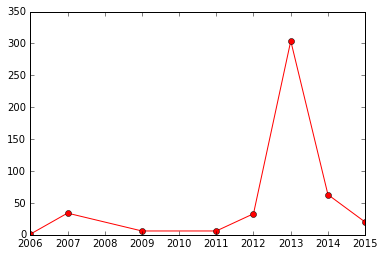

In [365]:
plt.plot(dd_date, dd.year, 'r-o')
plt.show()

In [384]:
ds = dd.cumsum()
ds

,year
2006,1
2007,35
2009,41
2011,47
2012,80
2013,384
2014,447
2015,467


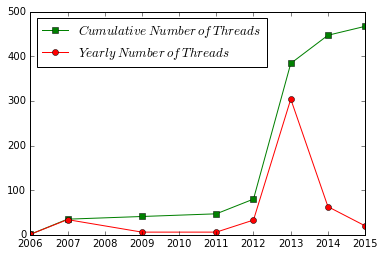

In [397]:
d = data.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
ds = dd.cumsum()

def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

ds.date = getDate(ds)
dd.date = getDate(dd)

plt.plot(ds_date, ds.year, 'g-s', label = '$Cumulative\: Number\:of\: Threads$')
plt.plot(dd_date, dd.year, 'r-o', label = '$Yearly\:Number\:of\:Threads$')
plt.legend(loc=2,numpoints=1,fontsize=13)
plt.show()

# groupby

In [398]:
dg = data.groupby('year').sum()
dg

,click,reply,followed_num,fans_num,post_num,comment_num,month,day
year,,,,,,,,
2006,1214,24,0,2,278,291,8,24
2007,28290,514,22,137,8041,10344,281,512
2009,18644,186,17,12,531,571,39,78
2011,2889,28,84,28,332,661,50,72
2012,463720,5933,2779,59511,12315,32498,322,819
2013,63140,937,571,43265,24359,40362,2458,6111
2014,57764,772,2216,16664,11266,98025,233,579
2015,81164,436,1649,272391,11217,20186,80,193


In [400]:
dgs = dg.cumsum()
dgs

,click,reply,followed_num,fans_num,post_num,comment_num,month,day
year,,,,,,,,
2006,1214,24,0,2,278,291,8,24
2007,29504,538,22,139,8319,10635,289,536
2009,48148,724,39,151,8850,11206,328,614
2011,51037,752,123,179,9182,11867,378,686
2012,514757,6685,2902,59690,21497,44365,700,1505
2013,577897,7622,3473,102955,45856,84727,3158,7616
2014,635661,8394,5689,119619,57122,182752,3391,8195
2015,716825,8830,7338,392010,68339,202938,3471,8388


In [414]:
def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

dg.date = getDate(dg)

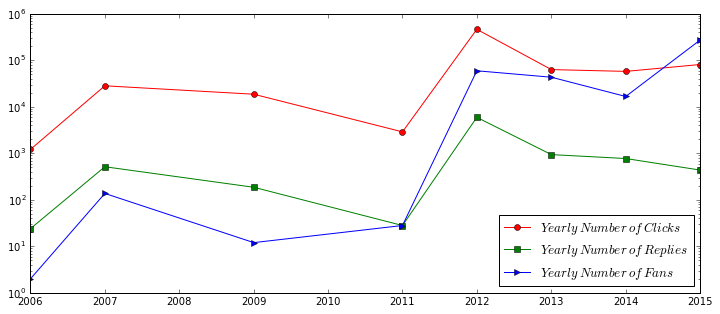

In [413]:
fig = plt.figure(figsize=(12,5))
plt.plot(dg.date, dg.click, 'r-o', label = '$Yearly\:Number\:of\:Clicks$')
plt.plot(dg.date, dg.reply, 'g-s', label = '$Yearly\:Number\:of\:Replies$')
plt.plot(dg.date, dg.fans_num, 'b->', label = '$Yearly\:Number\:of\:Fans$')

plt.yscale('log')

plt.legend(loc=4,numpoints=1,fontsize=13)
plt.show()

In [276]:
data.groupby('year')['click'].sum()

year
2006      1214
2007     28290
2009     18644
2011      2889
2012    463720
2013     63140
2014     57764
2015     81164
Name: click, dtype: int64

In [275]:
data.groupby('year')['click'].mean()

year
2006     1214.000000
2007      832.058824
2009     3107.333333
2011      481.500000
2012    14052.121212
2013      207.697368
2014      916.888889
2015     4058.200000
Name: click, dtype: float64

# A chi-squared test

https://en.wikipedia.org/wiki/Chi-squared_test

- also referred to as χ² test (or chi-square test), is any statistical hypothesis test in which the sampling distribution of the test statistic is a chi-square distribution when the null hypothesis is true. 
- A chi-squared test can then be used to reject the null hypothesis that the data are independent.
- Test statistics that follow a chi-squared distribution arise from an assumption of independent normally distributed data, which is valid in many cases due to the central limit theorem. 
- Chi-squared tests are often constructed from a sum of squared errors, or through the sample variance.




![](./img/600px-Chi-square_distributionCDF-English.png)

# scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)[source]
- Calculates a one-way chi square test.
- The chi square test tests the null hypothesis that the categorical data has the given frequencies.

Parameters:	
- f_obs : array_like Observed frequencies in each category.
- f_exp : array_like, optional Expected frequencies in each category. By default the categories are assumed to be equally likely.
- ddof : int, optional

Suppose there is a city of 1 million residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "blue collar", "white collar", or "no collar". The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification. The data are tabulated as:


|               |  A           |    B          |C              | D  | Total|
| -------------|:-------------:|:-------------:|:-------------:|-----:|-----:|
| White collar| 90 | 60 | 104 |95 | 349|
| Blue collar| 30 | 50 | 51 | 20| 151|
| No coloar| 30 | 40 | 45 | 35|150|
| Total | 150 | 150| 200| 150| 650|

Let us take the sample living in neighborhood A, 150/650, to estimate what proportion of the whole 1 million people live in neighborhood A. Similarly we take 349/650 to estimate what proportion of the 1 million people are white-collar workers. By the assumption of independence under the hypothesis we should "expect" the number of white-collar workers in neighborhood A to be

$
\frac{150}{650} \frac{349}{650} 650 = 80.54
$

Then in that "cell" of the table, we have

$\frac{(\text{observed}-\text{expected})^2}{\text{expected}} = \frac{(90-80.54)^2}{80.54}$.

The sum of these quantities over all of the cells is the test statistic. Under the null hypothesis, it has approximately a chi-square distribution whose number of degrees of freedom are

$ (\text{number of rows}-1)(\text{number of columns}-1) = (3-1)(4-1) = 6. $

If the test statistic is improbably large according to that chi-square distribution, then one rejects the null hypothesis of independence.

In [428]:
from scipy.stats import chisquare
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])


Power_divergenceResult(statistic=3.5, pvalue=0.62338762774958223)

![](./img/scipy_org_logo.gif)

In [427]:
from scipy.stats import chisqprob, chi2
# p_value = chi2.sf(chi_statistic, df)
print chisqprob(3.94,1), 1 - chi2.cdf(3.94,1)


0.0471507774946 0.0471507774946


# Correlation

In [168]:
print np.corrcoef(data.click, data.reply)

[[ 1.          0.96396571]
 [ 0.96396571  1.        ]]


In [383]:
data.corr()

,click,reply,followed_num,fans_num,post_num,comment_num,month,year,day
click,1.000000,0.963966,0.143595,0.158116,0.097502,0.085615,0.038788,-0.024827,0.048361
reply,0.963966,1.000000,0.199270,0.159387,0.090342,0.123341,0.040165,-0.041208,0.058738
followed_num,0.143595,0.199270,1.000000,0.407656,0.211677,0.499612,-0.036037,0.051187,-0.020604
fans_num,0.158116,0.159387,0.407656,1.000000,0.341724,0.145387,-0.084243,0.102301,-0.045883
post_num,0.097502,0.090342,0.211677,0.341724,1.000000,0.514695,-0.070024,-0.011786,-0.033254
comment_num,0.085615,0.123341,0.499612,0.145387,0.514695,1.000000,-0.118703,0.069160,-0.119840
month,0.038788,0.040165,-0.036037,-0.084243,-0.070024,-0.118703,1.000000,-0.236920,0.535354
year,-0.024827,-0.041208,0.051187,0.102301,-0.011786,0.069160,-0.236920,1.000000,-0.046699
day,0.048361,0.058738,-0.020604,-0.045883,-0.033254,-0.119840,0.535354,-0.046699,1.000000


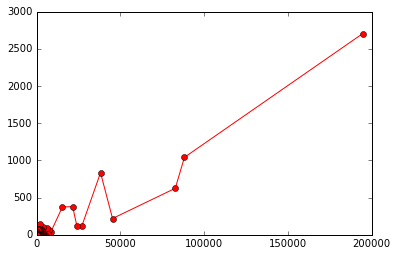

In [13]:

plt.plot(df.click, df.reply, 'r-o')
plt.show()

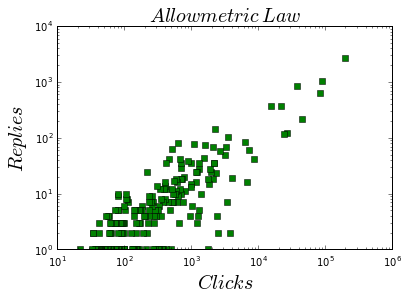

In [16]:
plt.plot(df.click, df.reply, 'gs')
plt.xlabel('$Clicks$', fontsize = 20)
plt.ylabel('$Replies$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.title('$Allowmetric\,Law$', fontsize = 20)
plt.show()

# Regression

In [19]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [21]:
# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sat, 16 Apr 2016   Prob (F-statistic):           1.90e-08
Time:                        23:39:42   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [137]:
reg = smf.ols('reply ~ click + followed_num', data=data).fit()

In [138]:
print reg.summary()

                            OLS Regression Results                            
Dep. Variable:                  reply   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     3231.
Date:                Sun, 17 Apr 2016   Prob (F-statistic):          4.30e-273
Time:                        02:04:27   Log-Likelihood:                -2354.7
No. Observations:                 467   AIC:                             4715.
Df Residuals:                     464   BIC:                             4728.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.4024      1.766     -0.794   

In [207]:
reg1 = smf.ols('np.log(reply+1) ~ np.log(click+1) +np.log(followed_num+1)+month', data=data).fit()
print reg1.summary()

                            OLS Regression Results                            
Dep. Variable:      np.log(reply + 1)   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     236.9
Date:                Sun, 17 Apr 2016   Prob (F-statistic):           4.03e-93
Time:                        14:22:55   Log-Likelihood:                -596.73
No. Observations:                 467   AIC:                             1201.
Df Residuals:                     463   BIC:                             1218.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

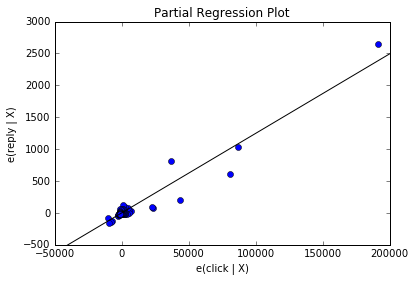

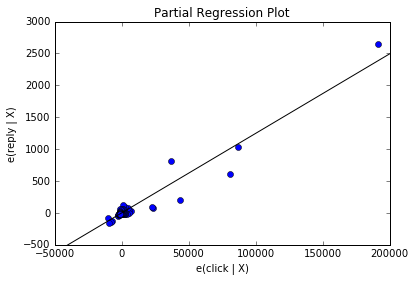

In [208]:
sm.graphics.plot_partregress('reply', 'click', ['followed_num'], data=data, obs_labels=False)

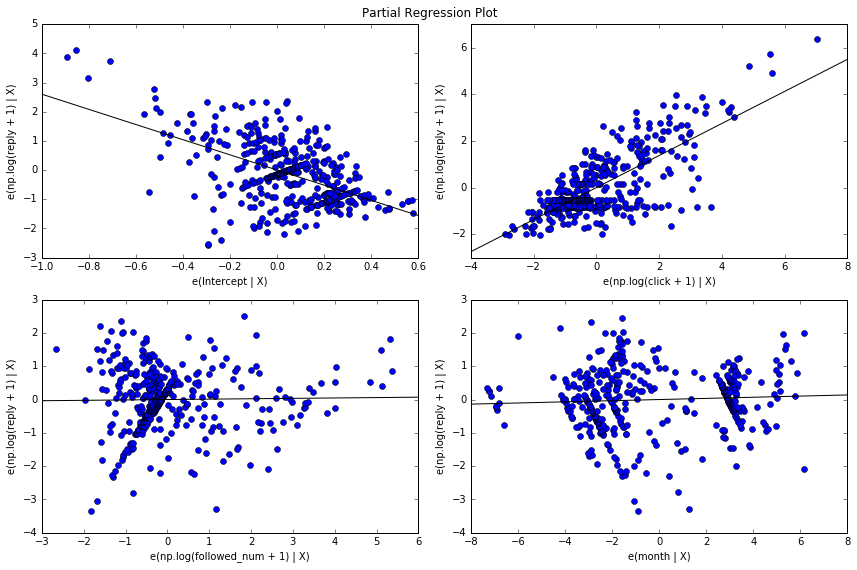

In [209]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(reg1, fig = fig)
plt.show()


In [429]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore = sm.datasets.get_rdataset("Moore", "car",
                                 cache=True) # load data
data = moore.data
data = data.rename(columns={"partner.status" :
                             "partner_status"}) # make name pythonic
 



In [434]:
data[:5]

,partner_status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [430]:
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
                 data=data).fit()

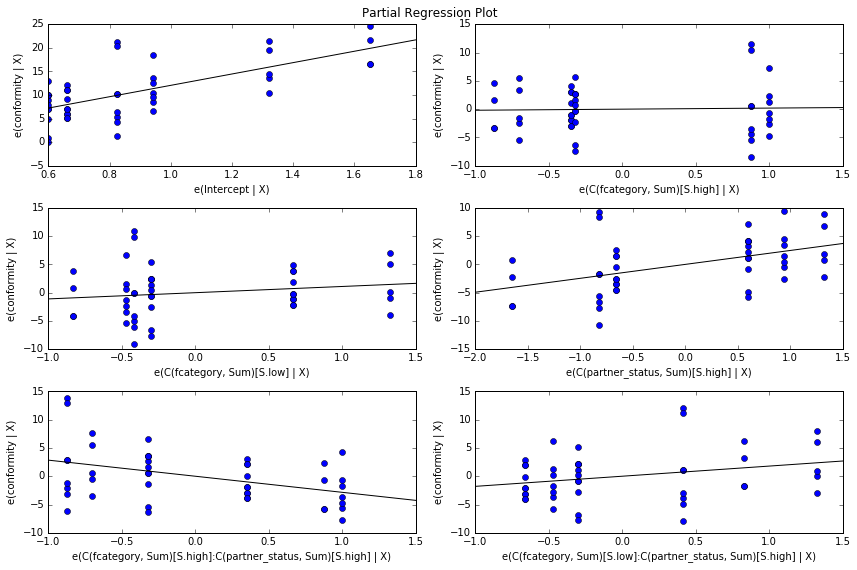

In [432]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(moore_lm, fig = fig)
plt.show()

In [431]:
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame
print table

                                              sum_sq    df          F  \
C(fcategory, Sum)                          11.614700   2.0   0.276958   
C(partner_status, Sum)                    212.213778   1.0  10.120692   
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2.0   4.184623   
Residual                                  817.763961  39.0        NaN   

                                            PR(>F)  
C(fcategory, Sum)                         0.759564  
C(partner_status, Sum)                    0.002874  
C(fcategory, Sum):C(partner_status, Sum)  0.022572  
Residual                                       NaN  


# 参考文献
- scipy-lectures http://www.scipy-lectures.org/index.html